Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Parameters

In [ ]:
delta_deg = 15.0 # degrees, angle of the thrust fault
delta = np.deg2rad(delta_deg)
x_d = 10.0  # km, distance inland from trench to downdip end projection
L = x_d / np.cos(delta)  # km, downdip length along the fault
d = L * np.sin(delta)    # km, depth to downdip end
s = -10.0                 # slip amplitude; sign chosen so thrust sense matches Fig. 3.10 text
x = np.linspace(-30.0, 40.0, 3001)  # km

Calculations based on Eq. 3.73 (Segall 2010)

In [18]:
def displacements_373(x1, s, delta, d, x_d):
    zeta = (x1 - x_d) / d
    arcterm = np.arctan(zeta) - 0.5 * np.pi * np.sign(x1)   # sgn(x) with x≡x1
    u1 = -(s / np.pi) * ( np.cos(delta) * arcterm + (np.sin(delta) - zeta*np.cos(delta)) / (1.0 + zeta**2) )
    u2 =  (s / np.pi) * ( np.sin(delta) * arcterm + (np.cos(delta) + zeta*np.sin(delta)) / (1.0 + zeta**2) )
    return u1, u2

u1, u2 = displacements_373(x, s, delta, d, x_d)

eps11 = np.gradient(u1, x)
u1_norm = u1 / abs(s)
u2_norm = u2 / abs(s)

Plots (Figure 3.10)

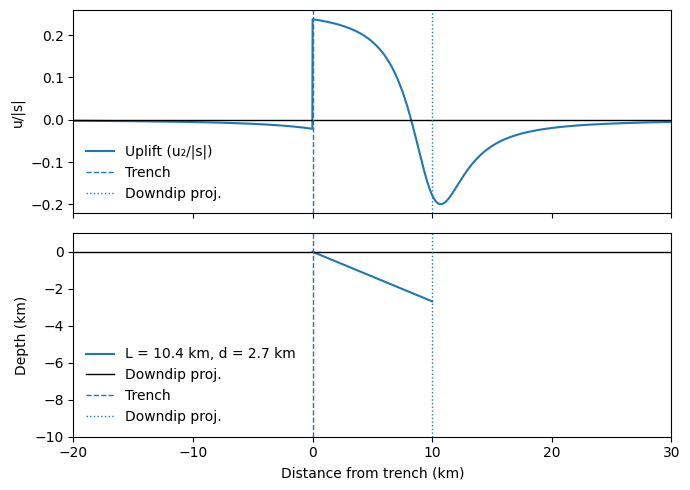

In [42]:
fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(7, 5), sharex=True,
                                     gridspec_kw={"height_ratios": [2.0, 2]})

ax_top.plot(x, u2_norm, label="Uplift (u₂/|s|)")
#ax_top.plot(x, u1_norm, label="Horizontal disp. (u₁/|s|)") # for plotting the horizontal displacement
ax_top.axhline(0,  lw=1.0, color='black')
ax_top.axvline(0.0, ls="--", lw=1.0, label="Trench")       # trench
ax_top.axvline(x_d, ls=":",  lw=1.0, label="Downdip proj.") # downdip projection
ax_top.set_ylabel("u/|s|")
ax_top.set_xlim(-20, 30)
ax_top.legend(loc="lower left", frameon=False)
ax_top.legend(loc="lower left", frameon=False)

line_fault, = ax_bot.plot([x_d, 0.0], [-d, 0.0], label=f"L = {L:.1f} km, d = {d:.1f} km")
ax_bot.axhline(0,  lw=1.0, color='black',label="Downdip proj.")
ax_bot.axvline(0.0, ls="--", lw=1.0, label="Trench")
ax_bot.axvline(x_d, ls=":",  lw=1.0, label="Downdip proj.")
ax_bot.set_xlabel("Distance from trench (km)")
ax_bot.set_ylabel("Depth (km)")
ax_bot.set_ylim(-10, 1.0)
ax_bot.legend(loc="lower left", frameon=False)

plt.tight_layout()
plt.show()